### **About the analysis 📊:**

As mentioned in the competition description:

This is the first Pog Champs challenge, where members of the kaggle and twitch community combine to create awesome models and share amazing notebooks!!

The task of this competition is to predict the like to view_count ratio of youtube videos based on the title, description, thumbnail and additional metadata. 

Work in Progress- This is a super late EDA as the competition is nearing its end and here I am first trying to know the data better and intend to build some interesting ML models in the future and gain tons of knowledge on the go. 

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
train_data = pd.read_parquet('../input/kaggle-pog-series-s01e01/train.parquet')
test_data = pd.read_parquet('../input/kaggle-pog-series-s01e01/test.parquet')
sample_submission = pd.read_csv('../input/kaggle-pog-series-s01e01/sample_submission.csv')

In [3]:
train_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.104
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.062
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.174
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.047
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.041


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92275 entries, 0 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           92275 non-null  object             
 1   title              92275 non-null  object             
 2   publishedAt        92275 non-null  datetime64[ns, UTC]
 3   channelId          92275 non-null  object             
 4   channelTitle       92275 non-null  object             
 5   categoryId         92275 non-null  int64              
 6   trending_date      92275 non-null  object             
 7   tags               92275 non-null  object             
 8   view_count         92275 non-null  int64              
 9   likes              92275 non-null  int64              
 10  dislikes           92275 non-null  int64              
 11  comment_count      92275 non-null  int64              
 12  thumbnail_link     92275 non-null  object     

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           5800 non-null   object             
 1   title              5800 non-null   object             
 2   publishedAt        5800 non-null   datetime64[ns, UTC]
 3   channelId          5800 non-null   object             
 4   channelTitle       5800 non-null   object             
 5   categoryId         5800 non-null   int64              
 6   trending_date      5800 non-null   object             
 7   tags               5800 non-null   object             
 8   thumbnail_link     5800 non-null   object             
 9   comments_disabled  5800 non-null   bool               
 10  ratings_disabled   5800 non-null   bool               
 11  description        5391 non-null   object             
 12  id                 5800 non-null   object       

### Exploratory Analysis:

In [6]:
cat_cols = [col for col in train_data.select_dtypes(include = ['object'])]
for col in train_data[cat_cols]:
    print(f"{col}-{train_data[col].nunique()}")

video_id-16969
title-17321
channelId-4563
channelTitle-4632
trending_date-461
tags-12891
thumbnail_link-16969
description-17703
id-92275


In [7]:
cat_cols = [col for col in test_data.select_dtypes(include = ['object'])]
for col in test_data[cat_cols]:
    print(f"{col}-{test_data[col].nunique()}")

video_id-1362
title-1405
channelId-922
channelTitle-925
trending_date-29
tags-976
thumbnail_link-1362
description-1276
id-5800


#### Check the distriution of numeric columns in train set:

The categoryId is a categorical feature instead of a continuous one. 

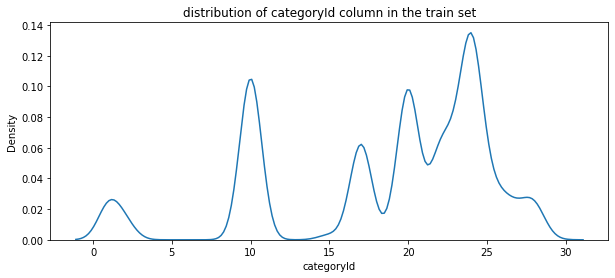

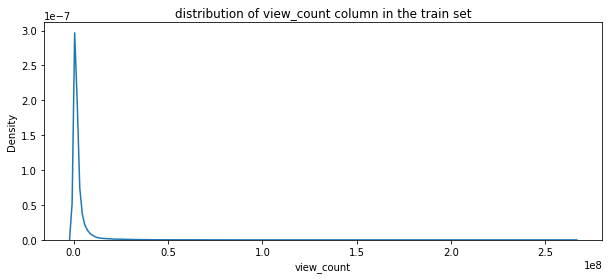

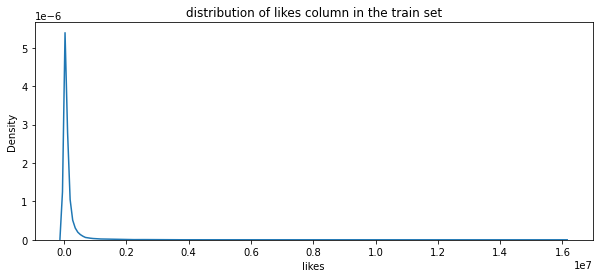

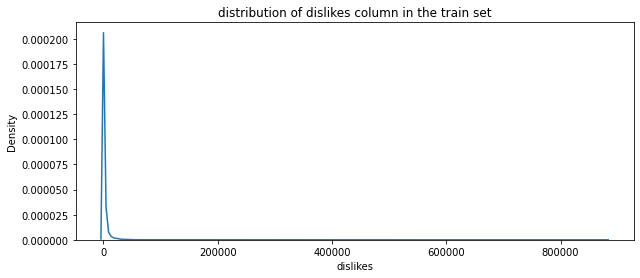

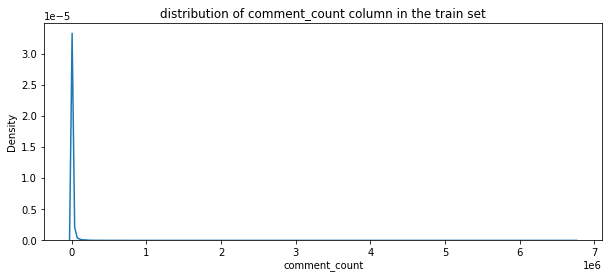

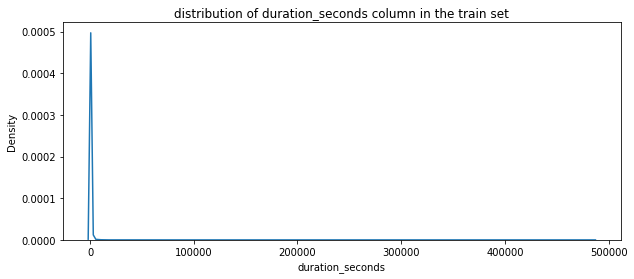

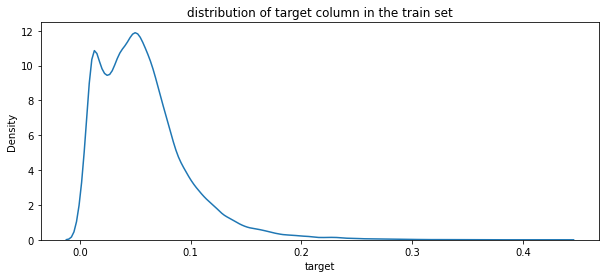

In [8]:
num_cols = [col for col in train_data.select_dtypes(include = ['int64', 'float64'])]#
for col in train_data[num_cols]:
    plt.figure(figsize=(10,4))
    sns.kdeplot(data = train_data[col])
    plt.title(f"distribution of {col} column in the train set")

#### Check the distriution of numeric columns in test set:
Looks like we don't have few columns present in the test set, like view_count, likes, dislikes, and comment count. Our target variable is the **ratio of like to view count**, so obiviously these two coloumns will not be there in the test set. 


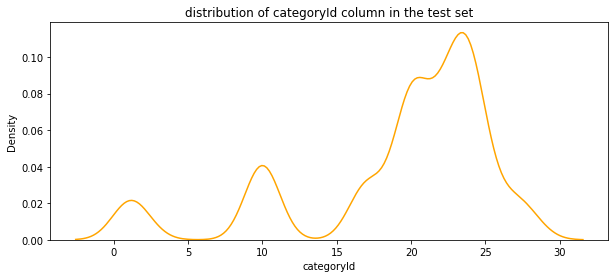

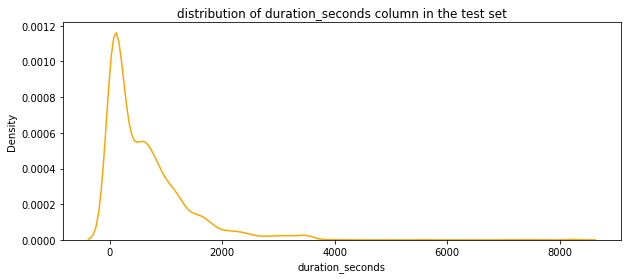

In [9]:
num_cols = [col for col in test_data.select_dtypes(include = ['int64', 'float64'])]#
for col in test_data[num_cols]:
    plt.figure(figsize=(10,4))
    sns.kdeplot(data = test_data[col], color = 'orange')
    plt.title(f"distribution of {col} column in the test set")

The duration_seconds does look interesting here, because the maximum value in the train data set is 485620 seconds much more than the test data's max duration. However, the 50th percentile(median) is in the same range. 

In [10]:
train_data['duration_seconds'].describe()

count    90099.000
mean       760.615
std       5816.819
min          3.000
25%        184.000
50%        446.000
75%        854.000
max     485620.000
Name: duration_seconds, dtype: float64

In [11]:
test_data['duration_seconds'].describe()

count   5780.000
mean     641.144
std      732.952
min       10.000
25%      113.000
50%      443.500
75%      911.000
max     8250.000
Name: duration_seconds, dtype: float64

#### Inspecting the CategoryId column:

Upon checking the categoryId column from the test and train data sets below, we found that the categories 15 and 29 are not present in the test data set. categoryId 23 has the highest ratio of likes/view count(our target)

Text(0.5, 1.02, 'CategoryId in the train set')

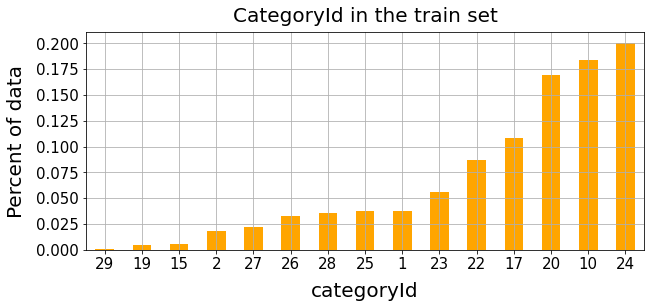

In [12]:
# plot
train_data['categoryId'].value_counts(normalize = True).sort_values().plot(kind='bar', figsize=(10,4), rot=0, color = 'orange')

plt.xlabel("categoryId", labelpad=10, fontsize=20)
plt.ylabel("Percent of data", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("CategoryId in the train set", y=1.02, fontsize=20)

Text(0.5, 1.02, 'CategoryId in the test set')

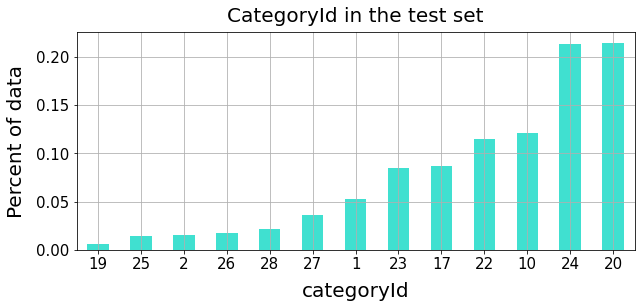

In [13]:
# plot
test_data['categoryId'].value_counts(normalize = True).sort_values().plot(kind='bar', figsize=(10,4), rot=0, color = 'turquoise')

plt.xlabel("categoryId", labelpad=10, fontsize=20)
plt.ylabel("Percent of data", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("CategoryId in the test set", y=1.02, fontsize=20)

Text(0.5, 1.02, 'categoryId wise target stats')

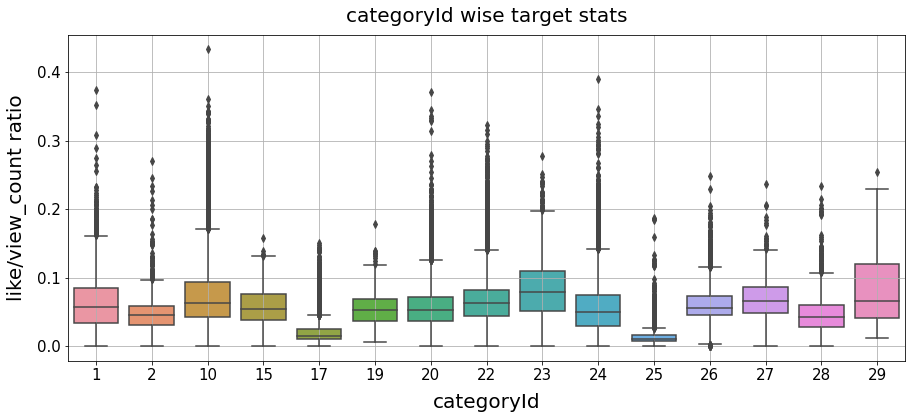

In [14]:
plt.figure(figsize = (15,6))
sns.boxplot(x = train_data['categoryId'], y= train_data['target'])
plt.xlabel("categoryId", labelpad=10, fontsize=20)
plt.ylabel("like/view_count ratio", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("categoryId wise target stats", y=1.02, fontsize=20)

In [15]:
train_data.groupby('categoryId')['target'].describe()

,count,mean,std,min,25%,50%,75%,max
categoryId,,,,,,,,
1,3514.000,0.063,0.040,0.000,0.034,0.057,0.085,0.374
2,1668.000,0.047,0.027,0.000,0.031,0.045,0.058,0.271
10,16967.000,0.076,0.050,0.000,0.043,0.063,0.094,0.434
15,504.000,0.057,0.026,0.000,0.038,0.054,0.075,0.157
17,10034.000,0.021,0.018,0.000,0.010,0.015,0.024,0.151
19,385.000,0.054,0.027,0.005,0.036,0.053,0.069,0.178
20,15593.000,0.057,0.031,0.000,0.037,0.053,0.072,0.371
22,8040.000,0.067,0.038,0.000,0.043,0.062,0.082,0.323
23,5126.000,0.082,0.040,0.000,0.052,0.078,0.110,0.278


#### Inspecting Date Columns:

We have two date columns that says the published date and trending date of a video. We can derive some features from these dates in further steps. The published videos in the train set are between 2020-08-03 to 2021-11-29. The published dates in the test data are between 2021-11-15 to 2021-12-29

In [16]:
train_data['publishedAt'] = pd.to_datetime(train_data['publishedAt'])
test_data['publishedAt'] = pd.to_datetime(test_data['publishedAt'])

train_data['trending_date'] = pd.to_datetime(train_data['trending_date'])
test_data['trending_date'] = pd.to_datetime(test_data['trending_date'])

In [17]:
train_data['publishedAt'].describe(datetime_is_numeric=True)

count                                  92275
mean     2021-04-02 23:04:22.610306048+00:00
min                2020-08-03 21:51:14+00:00
25%                2020-12-04 05:00:09+00:00
50%                2021-04-01 21:00:10+00:00
75%                2021-08-02 20:41:48+00:00
max                2021-11-29 18:50:25+00:00
Name: publishedAt, dtype: object

In [18]:
test_data['publishedAt'].describe(datetime_is_numeric=True)

count                                   5800
mean     2021-12-12 20:05:28.150517248+00:00
min                2021-11-15 17:06:20+00:00
25%         2021-12-06 02:46:21.500000+00:00
50%         2021-12-13 14:00:18.500000+00:00
75%                2021-12-19 17:11:36+00:00
max                2021-12-29 16:42:14+00:00
Name: publishedAt, dtype: object

In [19]:
train_data['trending_date'].describe(datetime_is_numeric=True)

count                            92275
mean     2021-04-06 09:19:01.271200256
min                2020-08-12 00:00:00
25%                2020-12-08 00:00:00
50%                2021-04-05 00:00:00
75%                2021-08-06 00:00:00
max                2021-11-30 00:00:00
Name: trending_date, dtype: object

In [20]:
test_data['trending_date'].describe(datetime_is_numeric=True)

count                             5800
mean     2021-12-15 21:31:02.068965632
min                2021-12-01 00:00:00
25%                2021-12-09 00:00:00
50%                2021-12-16 00:00:00
75%                2021-12-23 00:00:00
max                2021-12-30 00:00:00
Name: trending_date, dtype: object

#### Inspect some of the comments columns like, description, tags etc.

Some descriptions contain the #hashtag, and some donot have that.

In [21]:
train_data['description'][0]

'SUBSCRIBE to BRAWADIS ▶ http://bit.ly/SubscribeToBrawadis\r\rFOLLOW ME ON SOCIAL\r▶ Twitter: https://twitter.com/Brawadis\r▶ Instagram: https://www.instagram.com/brawadis/\r▶ Snapchat: brawadis\r\rHi! I’m Brandon Awadis and I like to make dope vlogs, pranks, reactions, challenges and basketball videos. Don’t forget to subscribe and come be a part of the BrawadSquad!'

In [22]:
train_data['description'][0]

'SUBSCRIBE to BRAWADIS ▶ http://bit.ly/SubscribeToBrawadis\r\rFOLLOW ME ON SOCIAL\r▶ Twitter: https://twitter.com/Brawadis\r▶ Instagram: https://www.instagram.com/brawadis/\r▶ Snapchat: brawadis\r\rHi! I’m Brandon Awadis and I like to make dope vlogs, pranks, reactions, challenges and basketball videos. Don’t forget to subscribe and come be a part of the BrawadSquad!'

In [23]:
train_data['description'][21]

"►►Subscribe to ScreenJunkies!► https://fandom.link/SJSubscribeOur Next Fandom 5 Trivia Show is on Avatar: The Last Airbender and will be Friday, August 14th! More Info►► https://fandom.link/AvatarTriviaInfo►►Watch the Honest Trailers Commentary LIVE on Fandom Entertainment► https://youtu.be/Ww9ZHVYLpJM►►100 Reasons Why You Should Love Avatar: The Last Airbender w/ Roth, Joe, & Spencer► https://youtu.be/ml5OSwEqB_UHonest Trailers | Avatar: The Last AirbenderVoice Narration: Jon Bailey aka Epic Voice GuyWritten by: Spencer Gilbert, Joe Starr, Danielle Radford, & Lon HarrisProduced by: Spencer Gilbert & Joe StarrEdited by: Kevin WilliamsenPost-Production Supervisor: Emin BassavandSupervising Producer: Max DionneAssociate Producer: Ryan O'TooleExecutive Producer: Roth Cornet#HonestTrailers"

In [24]:
train_data['tags'][0]

'brawadis|prank|basketball|skits|ghost|funny videos|vlog|vlogging|NBA|browadis|challenges|bmw i8|faze rug|faze rug brother|mama rug and papa rug'

In [25]:
train_data['title'][1]

'Apex Legends | Stories from the Outlands – “The Endorsement”'

### Feature Engineering:

In [26]:
test_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.000,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.000,True,True
2,F1Hq8eVOMHs,Is Meat Really that Bad?,2021-11-30 15:01:34+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2021-12-01,[None],https://i.ytimg.com/vi/F1Hq8eVOMHs/default.jpg,False,False,"The first 1,000 people to use this link will g...",F1Hq8eVOMHs_2021-12-01,728.000,True,True
3,GQXVQmcGQUY,Things Get Strange With The UnderTaker | Cold ...,2021-11-30 16:00:27+00:00,UCLRmIdRJgLfmdpJufmBhBuA,LOL Network,23,2021-12-01,kevin hart|hartbeat productions|funny|comedy|c...,https://i.ytimg.com/vi/GQXVQmcGQUY/default.jpg,False,False,#PoweredByOldSpice Thought by many as one of t...,GQXVQmcGQUY_2021-12-01,829.000,True,True
4,n4XojTb6pfs,People Pleasers at a Restaurant,2021-11-30 17:15:02+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/n4XojTb6pfs/default.jpg,False,False,I apologize for existing - please throw me out...,n4XojTb6pfs_2021-12-01,31.000,True,True


In [27]:
X = train_data.drop(columns = {'target'})
y = train_data['target']

print(X.shape, y.shape)

(92275, 19) (92275,)


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(61824, 19) (30451, 19) (61824,) (30451,)


##### Feature Engineering: 

Here I am just using the datetime columns to derive few basic features to make baseline model.

In [29]:
CAT_COLS = ['video_id', 'channelId', 'channelTitle', 'categoryId', 'comments_disabled', 'ratings_disabled', \
            'published_day', 'published_month', 'published_hour', 'published_dayofweek', 'trending_day', \
            'trending_month', 'trending_dayofweek']

FEATURE_COLS = ['video_id', 'channelId', 'channelTitle', 'categoryId', 'comments_disabled', 'ratings_disabled', \
            'published_day', 'published_month', 'published_hour', 'published_dayofweek', 'trending_day', \
            'trending_month', 'trending_dayofweek', 'duration_seconds', 'id']


# very basic feature engineering without using the tags/ description column
def feature_transform(df: pd.DataFrame):
    
    # date feature engineering
    df['publishedAt'] = pd.to_datetime(df['publishedAt'], utc = True)
    df['published_day'] = df['publishedAt'].dt.day
    df['published_month'] = df['publishedAt'].dt.month
    df['published_hour'] = df['publishedAt'].dt.hour
    df['published_dayofweek'] = df['publishedAt'].dt.dayofweek
    
    df['trending_date'] = pd.to_datetime(df['trending_date'], utc = True)
    df['trending_day'] = df['trending_date'].dt.day
    df['trending_month'] = df['trending_date'].dt.month
    df['trending_dayofweek'] = df['trending_date'].dt.dayofweek
    
    
    # duration_seconds
    
    df['duration_seconds'] = df['duration_seconds'].fillna(df.groupby('categoryId')['duration_seconds'].transform('mean'))
    
    
    # categorical_transform():
    for col in CAT_COLS:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        
        
    return df
    

In [30]:
train = feature_transform(X_train)
X_train = train[FEATURE_COLS].set_index('id')

val = feature_transform(X_val)
X_val = val[FEATURE_COLS].set_index('id')

In [31]:
# transform for using all data for training at the end

X_train_all = feature_transform(X)
X_train_all = X_train_all[FEATURE_COLS].set_index('id')

y_train_all = y

print(X_train_all.shape, y_train_all.shape)

(92275, 14) (92275,)


In [32]:
test = feature_transform(test_data)
test_df = test[FEATURE_COLS].set_index('id')

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5800 entries, _wNsZEqpKUA_2021-12-01 to _-K-sVn8Iko_2021-12-30
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             5800 non-null   int64  
 1   channelId            5800 non-null   int64  
 2   channelTitle         5800 non-null   int64  
 3   categoryId           5800 non-null   int64  
 4   comments_disabled    5800 non-null   int64  
 5   ratings_disabled     5800 non-null   int64  
 6   published_day        5800 non-null   int64  
 7   published_month      5800 non-null   int64  
 8   published_hour       5800 non-null   int64  
 9   published_dayofweek  5800 non-null   int64  
 10  trending_day         5800 non-null   int64  
 11  trending_month       5800 non-null   int64  
 12  trending_dayofweek   5800 non-null   int64  
 13  duration_seconds     5800 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 679.7+ KB


#### Making few baseline models with minimal feature engineering:

Using the Voting regressor technique from this article from machinelearningmastery https://machinelearningmastery.com/weighted-average-ensemble-with-python/ . Please go through it. 

In [34]:
# prepare a list of base models
def get_models():
    models = list()
    models.append(('rfr', RandomForestRegressor()))
    models.append(('xgb', xgb.XGBRegressor()))
    models.append(('lgbm', LGBMRegressor()))
    return models


# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
    # fit and evaluate the models
    scores = list()
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        scores.append(-mae)
    return scores


models = get_models()
scores = evaluate_models(models, X_train, X_val, y_train, y_val)
print(scores)
for i in range(len(models)):
    print('%s: %.3f' % (models[i][0], scores[i]))

[-0.017939248145550597, -0.023373809648602823, -0.022842026651744195]
rfr: -0.018
xgb: -0.023
lgbm: -0.023


In [35]:
ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train_all, y_train_all)
test_df['target'] = ensemble.predict(test_df)

In [36]:
submission = test_df['target'].reset_index()
submission

,id,target
0,_wNsZEqpKUA_2021-12-01,0.085
1,2jfbXZiE6Lc_2021-12-01,0.086
2,F1Hq8eVOMHs_2021-12-01,0.061
3,GQXVQmcGQUY_2021-12-01,0.068
4,n4XojTb6pfs_2021-12-01,0.082
...,...,...
5795,hJfpCXAMYPM_2021-12-30,0.068
5796,MbmTMEYnEzo_2021-12-30,0.068
5797,VG7arSAYvQI_2021-12-30,0.071
5798,SNb-g-hNYYs_2021-12-30,0.049


In [37]:
submission.to_csv('submission.csv',index=False)

### Next steps: robust feature engineering and hyperparameter tuning